# tspのソルバーの求解性能を調べる

## まずクラスタの最大都市数を調べる

一つの車両でクラスタ内を回りきるため、クラスタ内の都市の最大値は車両の容量になる。
そこで各インスタンスの積載容量を調べる

In [3]:
import json
import pandas as pd
from pathlib import Path
# Jupyter/IPython環境でDataFrameを表示するために必要
from IPython.display import display

# --- 1. 設定 ---
# 走査対象のディレクトリ (outフォルダ)
TARGET_DIR = Path("/home/toshiya1048/dev/QA_knap/out")
#保存対象のディレクトリ
OUT_DIR = Path("/home/toshiya1048/dev/QA_knap/analysis/res_tspsolver")
# 走査対象のファイル名パターン (第一階層のみ)
FILE_PATTERN = "*_before_data.json"
# 出力するCSVファイル名
OUTPUT_CSV_FILE = "capacity_summary.csv"

# 結果を格納するリスト
capacity_data = []

# --- 2. ファイル走査とデータ抽出 ---
print(f"ターゲットディレクトリ: {TARGET_DIR.resolve()}")
print(f"走査パターン: {FILE_PATTERN}")

# 該当するすべてのJSONファイルを取得 (第一階層のみ)
json_files = TARGET_DIR.glob(FILE_PATTERN)

if not TARGET_DIR.is_dir():
    print(f"警告: ターゲットディレクトリ '{TARGET_DIR}' が存在しません。処理をスキップします。")
else:
    for file_path in json_files:
        try:
            # インスタンス名 (ファイル名から "_before_data.json" を除去)
            instance_name = file_path.stem.replace("_before_data", "")
            
            print(f"処理中: {file_path.name} (インスタンス: {instance_name})")

            # JSONファイルの読み込み
            with open(file_path, 'r', encoding='utf-8') as f:
                instance_data = json.load(f)

            # 各クラスタのデータを処理
            # instance_dataは { "cluster_42": { ... }, ... } の構造
            for cluster_key, cluster_data in instance_data.items():
                
                # *** 修正点: cluster_data が辞書型であることを確認 ***
                if not isinstance(cluster_data, dict):
                    print(f"  [WARN] キー '{cluster_key}' のデータが辞書型ではありません ({type(cluster_data).__name__})。スキップします。")
                    continue
                # *************************************************

                # capacity の値を取得。キーが存在しない場合に備えてデフォルト値 (None) を設定
                capacity = cluster_data.get("capacity")
                
                # 結果リストに追加
                capacity_data.append({
                    "Instance_Name": instance_name,
                    "Cluster_Key": cluster_key,
                    "Capacity": capacity
                })

        except FileNotFoundError:
            print(f"[ERROR] ファイルが見つかりません: {file_path.name}。スキップします。")
        except json.JSONDecodeError:
            print(f"[ERROR] JSONのデコードに失敗しました: {file_path.name}。スキップします。")
        except Exception as e:
            # 念のため、他の予期せぬエラーも引き続きキャッチして表示
            print(f"[ERROR] 予期せぬエラー ({e}) が発生しました: {file_path.name}。スキップします。")

# --- 3. DataFrameの作成とCSV出力 ---
if capacity_data:
    # リストをPandas DataFrameに変換
    df = pd.DataFrame(capacity_data)
    
    # CSVファイルとして保存
    output_path =  OUT_DIR/OUTPUT_CSV_FILE
    df.to_csv(output_path, index=False, encoding='utf-8')
    
    print("\n--- 処理完了 ---")
    print(f"抽出されたデータ件数: {len(df)}")
    print(f"結果は以下のファイルに保存されました: {output_path.resolve()}")
    
    # Jupyter Notebookで結果のプレビューを表示
    print("\n抽出結果のプレビュー:")
    display(df.head(10))
else:
    print("\n--- 処理完了 ---")
    print(f"該当するファイル（{FILE_PATTERN}）が見つからなかったか、データが抽出されませんでした。")

ターゲットディレクトリ: /home/toshiya1048/dev/QA_knap/out
走査パターン: *_before_data.json
処理中: X-n331-k15_before_data.json (インスタンス: X-n331-k15)
  [WARN] キー 'instance' のデータが辞書型ではありません (str)。スキップします。
  [WARN] キー 'time_clustering' のデータが辞書型ではありません (float)。スキップします。
処理中: X-n876-k59_before_data.json (インスタンス: X-n876-k59)
  [WARN] キー 'instance' のデータが辞書型ではありません (str)。スキップします。
  [WARN] キー 'time_clustering' のデータが辞書型ではありません (float)。スキップします。
処理中: X-n491-k59_before_data.json (インスタンス: X-n491-k59)
  [WARN] キー 'instance' のデータが辞書型ではありません (str)。スキップします。
  [WARN] キー 'time_clustering' のデータが辞書型ではありません (float)。スキップします。
処理中: X-n110-k13_before_data.json (インスタンス: X-n110-k13)
  [WARN] キー 'instance' のデータが辞書型ではありません (str)。スキップします。
  [WARN] キー 'time_clustering' のデータが辞書型ではありません (float)。スキップします。
処理中: X-n200-k36_before_data.json (インスタンス: X-n200-k36)
  [WARN] キー 'instance' のデータが辞書型ではありません (str)。スキップします。
  [WARN] キー 'time_clustering' のデータが辞書型ではありません (float)。スキップします。
処理中: X-n613-k62_before_data.json (インスタンス: X-n613-k62)
  [WARN] キー 'inst

,Instance_Name,Cluster_Key,Capacity
0,X-n331-k15,cluster_5,23
1,X-n331-k15,cluster_6,23
2,X-n331-k15,cluster_2,23
3,X-n331-k15,cluster_8,23
4,X-n331-k15,cluster_10,23
5,X-n331-k15,cluster_14,23
6,X-n331-k15,cluster_3,23
7,X-n331-k15,cluster_12,23
8,X-n331-k15,cluster_9,23
9,X-n331-k15,cluster_13,23


In [5]:
# --- 1. 設定 ---
# 走査対象のディレクトリ (前のセルと同じパスを使用)

# 入力するCSVファイル名 (前のセルで生成したもの)
INPUT_CSV_FILE = OUT_DIR / "capacity_summary.csv"

# --- 2. CSVファイルの読み込みと処理 ---
print(f"CSVファイルを読み込み中: {INPUT_CSV_FILE.resolve()}")

if not INPUT_CSV_FILE.exists():
    print(f"エラー: 指定されたCSVファイルが見つかりません: {INPUT_CSV_FILE.name}")
else:
    try:
        # CSVファイルの読み込み
        df = pd.read_csv(INPUT_CSV_FILE)

        # Capacity 列のデータ型を数値型に変換 (NaNや欠損値は無視される)
        df['Capacity'] = pd.to_numeric(df['Capacity'], errors='coerce')

        # Capacity 列の最大値を計算
        max_capacity = df['Capacity'].max()

        # 結果表示
        print("\n--- Capacity の最大値 ---")
        if pd.notna(max_capacity):
            print(f"最大 Capacity: {max_capacity}")
        else:
            print("エラー: Capacity 列に有効な数値データが見つかりませんでした。")
            
        # print("\n--- データセットの概要 ---")
        # display(df.describe())
        
    except Exception as e:
        print(f"予期せぬエラーが発生しました: {e}")

CSVファイルを読み込み中: /home/toshiya1048/dev/QA_knap/analysis/res_tspsolver/capacity_summary.csv

--- Capacity の最大値 ---
最大 Capacity: 8000


## 8000以下の問題に対して以下のソルバーの求解の性能を調べる

・ LKH \
・ Google-ORTools

In [ ]:
import pandas as pd
import os
from IPython.display import display

# --- 1. 設定 ---
# CSVファイルのパス
FILE_PATH = "/home/toshiya1048/dev/QA_knap/analysis/res_tspsolver/tsplib_lkh_results.csv"

# --- 2. データの読み込み ---
print(f"データファイル: {FILE_PATH}")

if not os.path.exists(FILE_PATH):
    print("エラー: 指定されたCSVファイルが見つかりません。パスを確認してください。")
else:
    try:
        # CSVファイルをDataFrameとして読み込む
        df = pd.read_csv(FILE_PATH)

        # --- 3. データ型のクリーニング ---
        # 必要なカラムを数値型に変換
        # costとbest_knownは整数として扱われることを想定
        df['cost'] = pd.to_numeric(df['cost'], errors='coerce')
        df['best_known'] = pd.to_numeric(df['best_known'], errors='coerce')
        df['elapsed_sec'] = pd.to_numeric(df['elapsed_sec'], errors='coerce')
        
        # 求解時間を秒からミリ秒に変換 (表示用)
        df['elapsed_ms'] = (df['elapsed_sec'] * 1000).round(3)

        # --- 4. 最適解のフィルタリング ---
        # 条件: 1. LKHの実行が成功 (ok == True) 
        #       2. 発見されたコスト (cost) が既知の最良コスト (best_known) と一致する (gap_percent=0.0の行と一致するはず)
        optimal_solutions = df[
            (df['ok'] == True) & 
            (df['cost'] == df['best_known'])
        ].copy()

        # 結果の表示に必要なカラムを選択し、求解時間でソート
        result_df = optimal_solutions[['instance', 'cost', 'elapsed_ms']].sort_values(by='elapsed_ms')
        
        # --- 5. 結果の出力 ---
        if not result_df.empty:
            print("\n--- LKHにより最適解 (best known cost) が得られたインスタンス ---")
            print(f"総件数: {len(result_df)}")
            print("\n[インスタンス名 / 最適コスト / 求解時間 (ms)]")

            # 抽出結果を整形して表示
            for index, row in result_df.iterrows():
                # cost は整数として表示
                print(f"{row['instance']:<10} | {int(row['cost']):<10} | {row['elapsed_ms']:>8.3f} ms")

            # 最終的なDataFrameをJupyter環境で表示
            print("\n--- 抽出結果DataFrame ---")
            display(result_df)
        else:
            print("\n--- 処理完了 ---")
            print("最適解 (cost == best_known) が見つかったインスタンスはありませんでした。")

    except Exception as e:
        print(f"データの処理中に予期せぬエラーが発生しました: {e}")

## amplifyとlkhとortoolsと

type(routes_data): <class 'list'>
1st record example: {'cluster_id': 0, 'route': [0, 60, 94, 99, 39, 101, 38, 93, 0], 'total_time': 11.774256, 'execution_time': 9.903669, 'response_time': 11.770179, 'total_distance': 84.0}
routes_df columns: Index(['cluster_id', 'route', 'total_time', 'execution_time', 'response_time',
       'total_distance'],
      dtype='object')
#rows in routes_df: 15
#clusters in JSON: 15
#clusters actually plotted: 15


/tmp/ipykernel_16995/166248085.py:154: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("tab20", len(plot_data) if plot_data else 1)


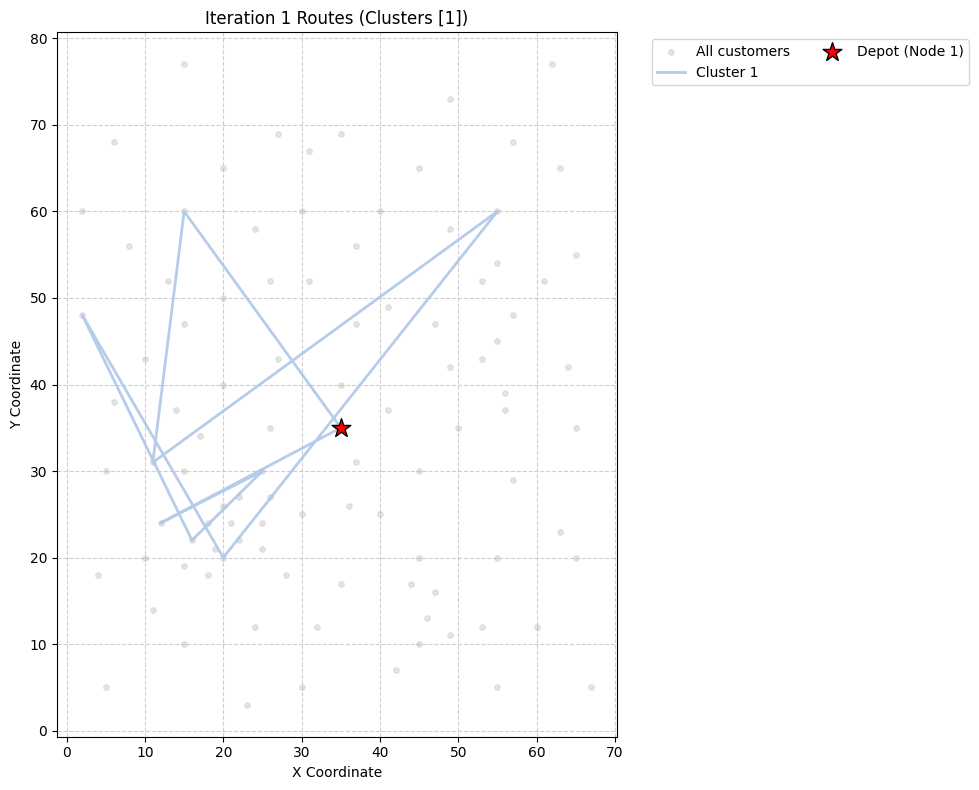

In [ ]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import json

# ファイルパス
vrp_file = "/home/toshiya1048/dev/QA_knap/data/raw/Leuven2.vrp"
vrp_file = "/home/toshiya1048/dev/QA_knap/data/raw/E-n101-k14.vrp"
amplify_json_file = "/home/toshiya1048/dev/QA_knap/out/ex3/20251108_111437/Leuven2_before_data/iteration_1.json"
amplify_json_file = "/home/toshiya1048/dev/QA_knap/out/ex3/20251108_100323/E-n101-k14_before_data/iteration_1.json"
output_image = "cluster_routes_iteration_1_corrected.png"

def parse_vrp_robust(filename):
    coords = {}
    depot_id = None
    in_coord_section = False
    in_depot_section = False
    
    with open(filename, 'r') as f:
        for line in f:
            line = line.strip()
            if not line or line.startswith('[source') or line.startswith('COMMENT'):
                continue
            
            if line == "NODE_COORD_SECTION":
                in_coord_section = True
                in_depot_section = False
                continue
            
            if line.startswith("DEMAND_SECTION"):
                in_coord_section = False
                in_depot_section = False
                continue
            
            if line.startswith("DEPOT_SECTION"):
                in_coord_section = False
                in_depot_section = True
                continue
            
            if line == "-1" or line.startswith("EOF"):
                in_depot_section = False
                continue
            
            if in_coord_section:
                parts = line.split()
                if len(parts) >= 3:
                    node_id = int(parts[0])
                    x = float(parts[1])
                    y = float(parts[2])
                    coords[node_id] = {'x': x, 'y': y}
            
            if in_depot_section and depot_id is None:
                try:
                    depot_id = int(line.split()[0])
                except ValueError:
                    pass

    coord_df = pd.DataFrame.from_dict(coords, orient='index')
    coord_df.index.name = 'VRP_Node_ID'
    
    depot_coord = coord_df.loc[depot_id].to_dict() if depot_id and depot_id in coord_df.index else None
    return coord_df, depot_id, depot_coord

def map_index_to_vrp_id(index, depot_id):
    if index is None:
        return None
    if index == 0:
        return depot_id
    else:
        return index + 1

coord_df, depot_id, depot_coord = parse_vrp_robust(vrp_file)

with open(amplify_json_file, "r") as f:
    routes_data = json.load(f)

print("type(routes_data):", type(routes_data))
if isinstance(routes_data, list) and len(routes_data) > 0:
    print("1st record example:", routes_data[0])

routes_df = pd.DataFrame(routes_data)
print("routes_df columns:", routes_df.columns)
print("#rows in routes_df:", len(routes_df))

plot_data = []
max_node_index_in_routes = 0

for _, row in routes_df.iterrows():
    if "cluster_id" not in row or "route" not in row:
        continue

    cluster_id = row["cluster_id"]
    route_indices = row["route"] or []

    filtered_indices = [r for r in route_indices if (r is not None and r != 0)]
    if filtered_indices:
        max_node_index_in_routes = max(max_node_index_in_routes, max(filtered_indices))
    
    vrp_node_ids = []
    x_coords = []
    y_coords = []

    for idx in route_indices:
        if idx is None:
            continue
        vrp_id = map_index_to_vrp_id(idx, depot_id)
        if vrp_id is None:
            continue
        if vrp_id not in coord_df.index:
            continue

        vrp_node_ids.append(vrp_id)
        x_coords.append(coord_df.at[vrp_id, "x"])
        y_coords.append(coord_df.at[vrp_id, "y"])

    if not vrp_node_ids:
        continue

    plot_data.append({
        "cluster_id": cluster_id,
        "x": x_coords,
        "y": y_coords,
        "vrp_node_ids": vrp_node_ids,
    })

print("#clusters in JSON:", len(routes_df))
print("#clusters actually plotted:", len(plot_data))

if max_node_index_in_routes == 0:
    max_vrp_id_to_plot = depot_id
else:
    max_vrp_id_to_plot = max_node_index_in_routes + 1

nodes_to_plot = coord_df.loc[coord_df.index <= max_vrp_id_to_plot]
# ここで見たいクラスタを指定
# 例: [0] とか [1, 5] とか。None にすると今まで通り全部描画
TARGET_CLUSTER_IDS = [1]   # とりあえずクラスタ0だけ描いてみる
# TARGET_CLUSTER_IDS = None

plt.figure(figsize=(10, 8))

# 背景に全ノード（デポ以外）をグレーで
customer_nodes = coord_df.loc[coord_df.index != depot_id]
plt.scatter(
    customer_nodes["x"],
    customer_nodes["y"],
    s=15,
    c="lightgray",
    alpha=0.6,
    label="All customers",
)

colors = plt.cm.get_cmap("tab20", len(plot_data) if plot_data else 1)

n_plotted_clusters = 0

for i, data in enumerate(plot_data):
    cid = data["cluster_id"]
    
    # 特定クラスタだけに絞る
    if TARGET_CLUSTER_IDS is not None and cid not in TARGET_CLUSTER_IDS:
        continue

    n_plotted_clusters += 1

    plt.plot(
        data["x"],
        data["y"],
        linestyle="-",
        color=colors(i),
        linewidth=2,
        alpha=0.9,
        label=f"Cluster {cid}",
    )

    # ラベルは多いと重いから、まずはオフにしとく
    # 必要になったらコメントアウト外して
    """
    for j, vrp_id in enumerate(data["vrp_node_ids"]):
        if vrp_id == depot_id:
            continue
        plt.annotate(
            str(vrp_id),
            (data["x"][j], data["y"][j]),
            textcoords="offset points",
            xytext=(0, 5),
            ha="center",
            fontsize=7,
            color="black",
        )
    """

# デポ
if depot_coord:
    plt.scatter(
        depot_coord["x"],
        depot_coord["y"],
        s=200,
        marker="*",
        c="red",
        edgecolor="black",
        zorder=5,
        label=f"Depot (Node {depot_id})",
    )

plt.title(
    f"Iteration 1 Routes (Clusters {TARGET_CLUSTER_IDS if TARGET_CLUSTER_IDS is not None else 'ALL'})"
)
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(True, linestyle="--", alpha=0.6)
if n_plotted_clusters > 0:
    plt.legend(ncol=2, bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

plt.show()



type(routes_data): <class 'list'>
1st record example: {'cluster_id': 0, 'route': [0, 3, 5, 6, 2, 7, 1, 4], 'total_distance': 84.0, 'solver': 'lkh', 'solver_status': 'SUCCESS', 'solve_time_ms': 5}
routes_df columns: Index(['cluster_id', 'route', 'total_distance', 'solver', 'solver_status',
       'solve_time_ms'],
      dtype='object')
#rows in routes_df: 15
#clusters in JSON: 15
#clusters actually plotted: 15


/tmp/ipykernel_16995/793328167.py:153: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("tab20", len(plot_data) if plot_data else 1)


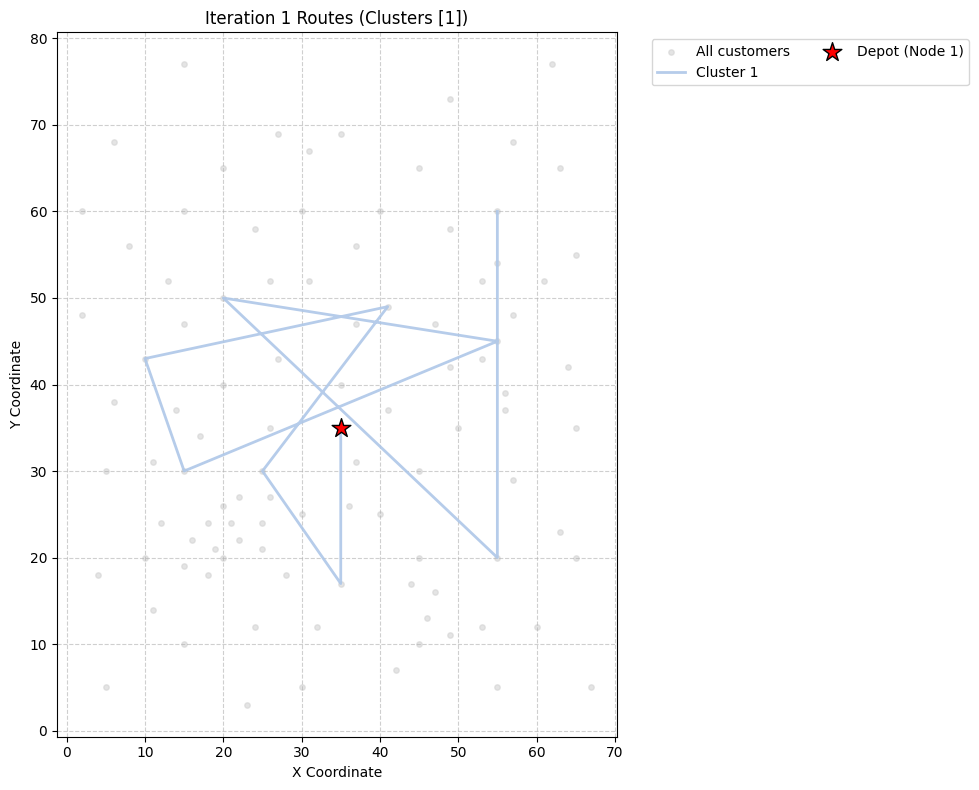

In [ ]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import json

# ファイルパス
vrp_file = "/home/toshiya1048/dev/QA_knap/data/raw/E-n101-k14.vrp"
amplify_json_file = "/home/toshiya1048/dev/QA_knap/out/lkhtest/20251114_180406/Leuven2_before_data/iteration_1.json"
amplify_json_file = "/home/toshiya1048/dev/QA_knap/out/lkhtest/20251114_170237/E-n101-k14_before_data/iteration_1.json"
output_image = "cluster_routes_iteration_1_corrected.png"

def parse_vrp_robust(filename):
    coords = {}
    depot_id = None
    in_coord_section = False
    in_depot_section = False
    
    with open(filename, 'r') as f:
        for line in f:
            line = line.strip()
            if not line or line.startswith('[source') or line.startswith('COMMENT'):
                continue
            
            if line == "NODE_COORD_SECTION":
                in_coord_section = True
                in_depot_section = False
                continue
            
            if line.startswith("DEMAND_SECTION"):
                in_coord_section = False
                in_depot_section = False
                continue
            
            if line.startswith("DEPOT_SECTION"):
                in_coord_section = False
                in_depot_section = True
                continue
            
            if line == "-1" or line.startswith("EOF"):
                in_depot_section = False
                continue
            
            if in_coord_section:
                parts = line.split()
                if len(parts) >= 3:
                    node_id = int(parts[0])
                    x = float(parts[1])
                    y = float(parts[2])
                    coords[node_id] = {'x': x, 'y': y}
            
            if in_depot_section and depot_id is None:
                try:
                    depot_id = int(line.split()[0])
                except ValueError:
                    pass

    coord_df = pd.DataFrame.from_dict(coords, orient='index')
    coord_df.index.name = 'VRP_Node_ID'
    
    depot_coord = coord_df.loc[depot_id].to_dict() if depot_id and depot_id in coord_df.index else None
    return coord_df, depot_id, depot_coord

def map_index_to_vrp_id(index, depot_id):
    if index is None:
        return None
    if index == 0:
        return depot_id
    else:
        return index + 1

coord_df, depot_id, depot_coord = parse_vrp_robust(vrp_file)

with open(amplify_json_file, "r") as f:
    routes_data = json.load(f)

print("type(routes_data):", type(routes_data))
if isinstance(routes_data, list) and len(routes_data) > 0:
    print("1st record example:", routes_data[0])

routes_df = pd.DataFrame(routes_data)
print("routes_df columns:", routes_df.columns)
print("#rows in routes_df:", len(routes_df))

plot_data = []
max_node_index_in_routes = 0

for _, row in routes_df.iterrows():
    if "cluster_id" not in row or "route" not in row:
        continue

    cluster_id = row["cluster_id"]
    route_indices = row["route"] or []

    filtered_indices = [r for r in route_indices if (r is not None and r != 0)]
    if filtered_indices:
        max_node_index_in_routes = max(max_node_index_in_routes, max(filtered_indices))
    
    vrp_node_ids = []
    x_coords = []
    y_coords = []

    for idx in route_indices:
        if idx is None:
            continue
        vrp_id = map_index_to_vrp_id(idx, depot_id)
        if vrp_id is None:
            continue
        if vrp_id not in coord_df.index:
            continue

        vrp_node_ids.append(vrp_id)
        x_coords.append(coord_df.at[vrp_id, "x"])
        y_coords.append(coord_df.at[vrp_id, "y"])

    if not vrp_node_ids:
        continue

    plot_data.append({
        "cluster_id": cluster_id,
        "x": x_coords,
        "y": y_coords,
        "vrp_node_ids": vrp_node_ids,
    })

print("#clusters in JSON:", len(routes_df))
print("#clusters actually plotted:", len(plot_data))

if max_node_index_in_routes == 0:
    max_vrp_id_to_plot = depot_id
else:
    max_vrp_id_to_plot = max_node_index_in_routes + 1

nodes_to_plot = coord_df.loc[coord_df.index <= max_vrp_id_to_plot]
# ここで見たいクラスタを指定
# 例: [0] とか [1, 5] とか。None にすると今まで通り全部描画
TARGET_CLUSTER_IDS = [4]   # とりあえずクラスタ0だけ描いてみる
# TARGET_CLUSTER_IDS = None

plt.figure(figsize=(10, 8))

# 背景に全ノード（デポ以外）をグレーで
customer_nodes = coord_df.loc[coord_df.index != depot_id]
plt.scatter(
    customer_nodes["x"],
    customer_nodes["y"],
    s=15,
    c="lightgray",
    alpha=0.6,
    label="All customers",
)

colors = plt.cm.get_cmap("tab20", len(plot_data) if plot_data else 1)

n_plotted_clusters = 0

for i, data in enumerate(plot_data):
    cid = data["cluster_id"]
    
    # 特定クラスタだけに絞る
    if TARGET_CLUSTER_IDS is not None and cid not in TARGET_CLUSTER_IDS:
        continue

    n_plotted_clusters += 1

    plt.plot(
        data["x"],
        data["y"],
        linestyle="-",
        color=colors(i),
        linewidth=2,
        alpha=0.9,
        label=f"Cluster {cid}",
    )

    # ラベルは多いと重いから、まずはオフにしとく
    # 必要になったらコメントアウト外して
    """
    for j, vrp_id in enumerate(data["vrp_node_ids"]):
        if vrp_id == depot_id:
            continue
        plt.annotate(
            str(vrp_id),
            (data["x"][j], data["y"][j]),
            textcoords="offset points",
            xytext=(0, 5),
            ha="center",
            fontsize=7,
            color="black",
        )
    """

# デポ
if depot_coord:
    plt.scatter(
        depot_coord["x"],
        depot_coord["y"],
        s=200,
        marker="*",
        c="red",
        edgecolor="black",
        zorder=5,
        label=f"Depot (Node {depot_id})",
    )

plt.title(
    f"Iteration 1 Routes (Clusters {TARGET_CLUSTER_IDS if TARGET_CLUSTER_IDS is not None else 'ALL'})"
)
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(True, linestyle="--", alpha=0.6)
if n_plotted_clusters > 0:
    plt.legend(ncol=2, bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

plt.show()

